In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


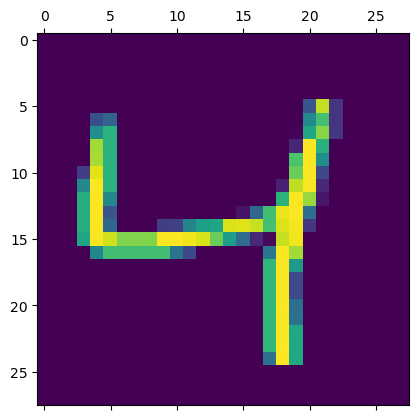

In [4]:
plt.matshow(X_train[2])

In [5]:
y_train[2]

4

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_train.reshape(len(X_train), 28*28)

In [8]:
print(X_train_flattened.shape, X_test_flattened.shape)

(60000, 784) (60000, 784)


In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# hist = model.fit(X_train_flattened, y_train, epochs=5)
hist = model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9840


In [10]:
model.evaluate(X_test_flattened, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [11]:
model.predict(X_test_flattened)

1875/1875 [==============================] - 4s 2ms/step


array([[7.70140289e-08, 1.57377290e-04, 3.93802375e-02, ...,
        2.34980648e-03, 3.74892377e-03, 2.70714308e-03],
       [9.99998033e-01, 9.71470872e-05, 8.43982458e-01, ...,
        4.17420873e-03, 8.17575958e-04, 7.01937318e-01],
       [1.33337253e-05, 1.80107020e-02, 3.25341791e-01, ...,
        6.43320501e-01, 2.52972543e-01, 3.39345098e-01],
       ...,
       [3.70873840e-06, 1.01591297e-03, 2.76677406e-06, ...,
        2.95103091e-05, 7.06682384e-01, 2.66236484e-01],
       [1.08562715e-01, 1.18844770e-02, 2.80687269e-02, ...,
        1.47254847e-03, 2.28356686e-03, 1.87424070e-03],
       [2.62566179e-01, 6.28317721e-05, 7.35564530e-03, ...,
        4.43693064e-02, 9.99426782e-01, 3.16874385e-01]], dtype=float32)

In [12]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

1875/1875 [==============================] - 4s 2ms/step


5

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [10000] != values[1].shape = [60000] [Op:Pack] name: stack

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'cm' is not defined

<Figure size 1000x700 with 0 Axes>